<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/LifeExpectancy/lifeexpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#import 
import numpy as np
import pandas as pd 
from google.colab import files 
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files.upload()

In [67]:
data = pd.read_csv('data.csv')
data = data.drop(columns=['Country', 'Year'],axis=1)
data = data.dropna(axis=0)
data = data.sample(frac=1)
data.head(5)

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
483,Developing,55.9,369.0,50,0.01,68.558391,85.0,609,27.2,76,85.0,4.34,85.0,4.6,1255.648189,2182383.0,5.9,5.9,0.496,10.4
2481,Developing,69.5,22.0,0,4.72,685.029908,84.0,0,52.6,0,84.0,5.92,84.0,0.8,5761.395360,5975.0,3.5,3.4,0.684,11.7
346,Developing,51.7,566.0,2,6.37,629.842564,92.0,5,32.7,3,96.0,5.62,96.0,20.6,5351.253732,1855852.0,1.0,9.9,0.593,11.9
639,Developing,77.5,1.0,1,4.29,868.371359,8.0,0,46.4,1,92.0,7.25,91.0,0.1,3981.528470,3996798.0,2.3,2.2,0.708,11.7
2639,Developing,72.5,147.0,0,1.08,4.783806,84.0,0,72.1,0,86.0,4.67,84.0,0.1,37.846563,1364.0,0.1,0.1,0.703,14.5


In [68]:
Y = data['Life expectancy '].values
data = data.drop(columns=['Life expectancy '], axis=1)
for col in data:
  print(col)

Status
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [69]:
le = LE()
data['Status'] = le.fit_transform(data['Status'])
ss = SS()
data = ss.fit_transform(data)

In [77]:
trainX,testX,trainY,testY = tts(data,Y,test_size=0.1,random_state=0)

In [83]:
lr = LR()
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predictions = lr.predict(testX)

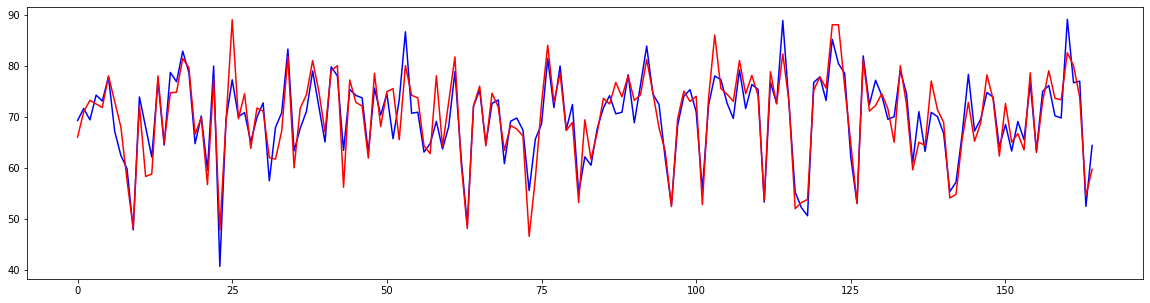

In [99]:
#graph actual vs predicted 
fig = plt.figure(figsize=(20,5))
plot = fig.add_subplot(1,1,1)
plot.plot(range(0,165),(predictions),color="blue")
plot.plot(range(0,165),(testY),color="red")
fig.show()

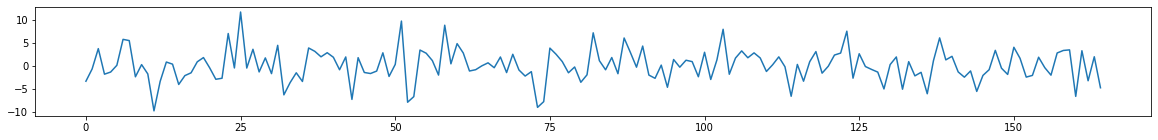

In [100]:
#graph error
fig = plt.figure(figsize=(20,2))
plot = fig.add_subplot(1,1,1)
plot.plot(range(0,165),(testY-predictions))
fig.show()